In [2]:
import numpy as np
import pandas as pd
import random
from scipy.stats import truncnorm

In [22]:
# Generar un número aleatorio con distribución normal de media 0 y desviación estándar 1
numero_normal = random.gauss(0, 1)
print(numero_normal)

-0.33605733804866855


In [64]:
collection = pd.DataFrame(
    {
        "n": [ random.expovariate(7) for n in range(100) ]
    }
)

<Axes: >

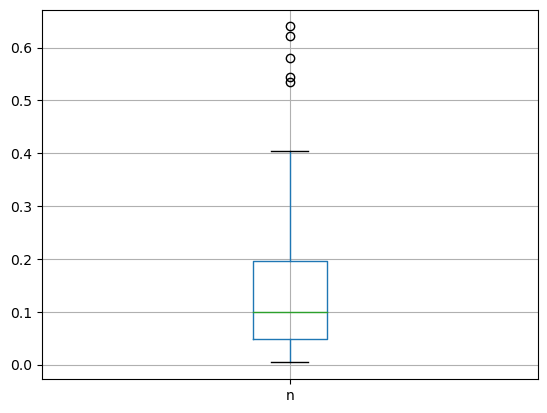

In [70]:
collection.boxplot()

In [50]:
import random

# Generar un número aleatorio con distribución exponencial con lambda = 1
numero_exponencial = random.expovariate(4)
print(numero_exponencial)

0.33407779823349854


In [4]:
data = pd.read_csv( '01_Data_Processed.csv' )

In [10]:
data.dtypes

epoch (ms)          object
Accelerometer_x    float64
Accelerometer_y    float64
Accelerometer_z    float64
Gyroscope_x        float64
Gyroscope_y        float64
Gyroscope_z        float64
Participants        object
Label               object
Category            object
Set                  int64
dtype: object

In [12]:
data.head()

,epoch (ms),Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set
0,2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
1,2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2,2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
3,2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
4,2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30


In [16]:
data['epoch (ms)'] = pd.to_datetime(data['epoch (ms)'])

In [18]:
data.dtypes

epoch (ms)         datetime64[ns]
Accelerometer_x           float64
Accelerometer_y           float64
Accelerometer_z           float64
Gyroscope_x               float64
Gyroscope_y               float64
Gyroscope_z               float64
Participants               object
Label                      object
Category                   object
Set                         int64
dtype: object

In [20]:
# Crear nuevas columnas con los componentes de la fecha
data['day'] = data['epoch (ms)'].dt.day
data['day_of_week'] = data['epoch (ms)'].dt.dayofweek  # Lunes = 0, Domingo = 6
data['month'] = data['epoch (ms)'].dt.month
data['year'] = data['epoch (ms)'].dt.year
data['hour'] = data['epoch (ms)'].dt.hour
data['minute'] = data['epoch (ms)'].dt.minute
data['second'] = data['epoch (ms)'].dt.second
data['microsecond'] = data['epoch (ms)'].dt.microsecond  # Para milisegundos en caso de que necesites precisión adicional

# Mostrar el DataFrame con las nuevas columnas
print(data)

                  epoch (ms)  Accelerometer_x  Accelerometer_y  \
0    2019-01-11 15:08:05.200         0.013500         0.977000   
1    2019-01-11 15:08:05.400        -0.001500         0.970500   
2    2019-01-11 15:08:05.600         0.001333         0.971667   
3    2019-01-11 15:08:05.800        -0.024000         0.957000   
4    2019-01-11 15:08:06.000        -0.028000         0.957667   
...                      ...              ...              ...   
9004 2019-01-20 17:33:27.000        -0.048000        -1.041500   
9005 2019-01-20 17:33:27.200        -0.037000        -1.030333   
9006 2019-01-20 17:33:27.400        -0.060000        -1.031000   
9007 2019-01-20 17:33:27.600        -0.038667        -1.025667   
9008 2019-01-20 17:33:27.800        -0.044000        -1.034000   

      Accelerometer_z  Gyroscope_x  Gyroscope_y  Gyroscope_z Participants  \
0           -0.071000      -1.8904       2.4392       0.9388            B   
1           -0.079500      -1.6826      -0.8904      

<Axes: title={'center': 'Accelerometer_x'}, xlabel='pdow'>

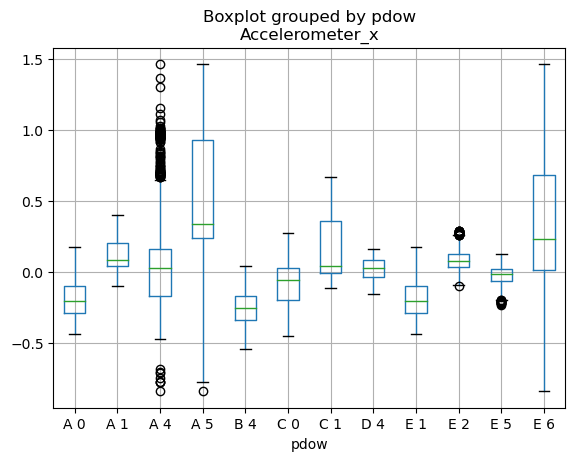

In [32]:
data.boxplot( column = "Accelerometer_x" , by="pdow" )

In [30]:

data["pdow"] = data['Participants'] + ' ' + data['day_of_week'].astype(str)

In [ ]:
data